# DBSCAN Clustering

## Introduction

DBSCAN, or Density-Based Spatial Clustering of Applications with Noise, is an effective unsupervised clustering algorithm that is excellent at discovering clusters with arbitrary shapes in datasets. Unlike traditional clustering algorithms which rely on predefined cluster centers, DBSCAN forms clusters based on the density of data points, making it particularly useful for datasets with complex structures and for identifying outliers.

## DBSCAN Algorithm Overview

DBSCAN works by identifying densely packed areas of the dataset as clusters and points in low-density areas as outliers. Here’s how it functions:

- **Density Estimation:** Measures the number of points within a specified radius ε (epsilon) from each point, which helps in estimating the density around that point.

- **Core Points:** Points that have more than a specified number of neighbors (minPts) within radius ε are classified as core points, which are essential for forming the clusters.

- **Cluster Formation:** A cluster is formed by connecting core points that are neighbors and then including any non-core points that happen to be within ε distance of these core points.

- **Noise Identification:** Points that do not belong to any cluster are labeled as noise.

This algorithm is particularly advantageous for its ability to identify clusters of varying shapes and densities without needing the number of clusters to be specified in advance.

## Advantages and Disadvantages of DBSCAN

### Advantages

- **Robust to Noise:** Capable of identifying and ignoring outliers.
- **Versatile:** Efficiently finds clusters of arbitrary shapes and sizes.
- **No Need to Specify Cluster Number:** Unlike K-means, DBSCAN does not require the number of clusters to be pre-defined.

### Disadvantages

- **Parameter Sensitivity:** The results are highly sensitive to the settings of ε and minPts.
- **Not Suitable for Varying Densities:** Struggles with datasets where the density varies significantly across clusters.

## Dataset Overview: Make Moons

The "make_moons" dataset is a synthetic dataset provided by the `sklearn.datasets` module. It is specifically designed to generate two interleaving half-circle shapes, which mimic two crescent moon shapes. This dataset is commonly used in machine learning to demonstrate the capability of clustering and classification algorithms to detect complex geometric patterns and non-linear boundaries.

### Characteristics of the Make Moons Dataset

- **Data Structure**: Consists of two clusters shaped like two moons.
- **Noise**: An optional parameter allows for the introduction of random noise into the data points, which can make the clustering task more challenging and realistic.
- **Samples**: The number of samples can be customized. For our analysis, we use 300 samples to ensure sufficient data points for demonstrating DBSCAN’s effectiveness.
- **Use Case**: Ideal for illustrating how clustering algorithms like DBSCAN handle non-linear cluster separation, which is a common scenario in real-world data.

This dataset is particularly useful for our purposes because it has inherent complexities that challenge simpler clustering methods that assume clusters are spherical or well-separated. By using "make_moons," we can better explore and demonstrate the strengths of DBSCAN in identifying and delineating complex cluster structures in the presence of noise and non-linear boundaries.

## Implementing DBSCAN with the Make Moons Dataset

The "make_moons" dataset provides an excellent opportunity to demonstrate how DBSCAN can detect intricate cluster structures, such as those formed by two interleaving half circles.

/Users/williamc1107/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


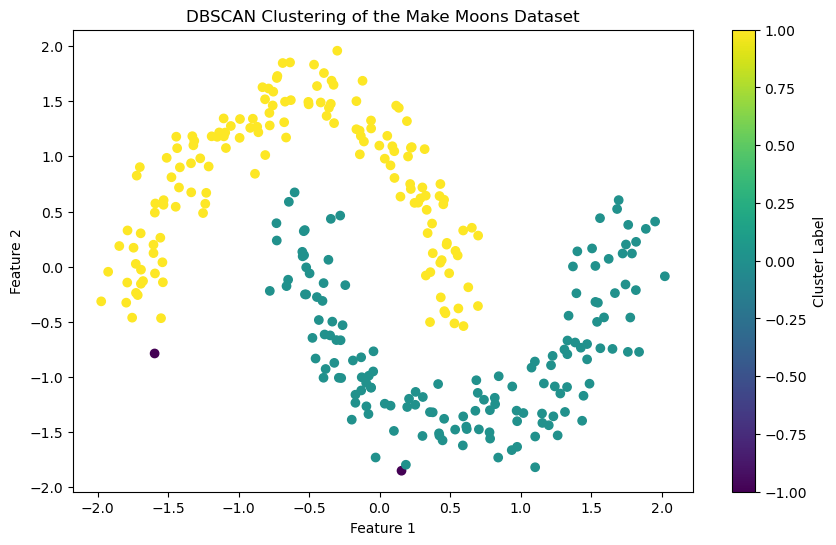

In [1]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate the make moons dataset
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

# Standardize the data
X_scaled = StandardScaler().fit_transform(X)

# Define the DBSCAN model
db = DBSCAN(eps=0.3, min_samples=5)

# Fit the model and predict clusters
y_db = db.fit_predict(X_scaled)

# Plot the cluster assignments
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_db, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering of the Make Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

### Exploring Different Combinations of eps and min_samples

The choice of `eps` (epsilon) and `min_samples` has a significant impact on the results of the DBSCAN algorithm. Varying these parameters can drastically change the clustering output. Below, we experiment with different values of `eps` and `min_samples` to understand their effects on the clustering of the "make moons" dataset.


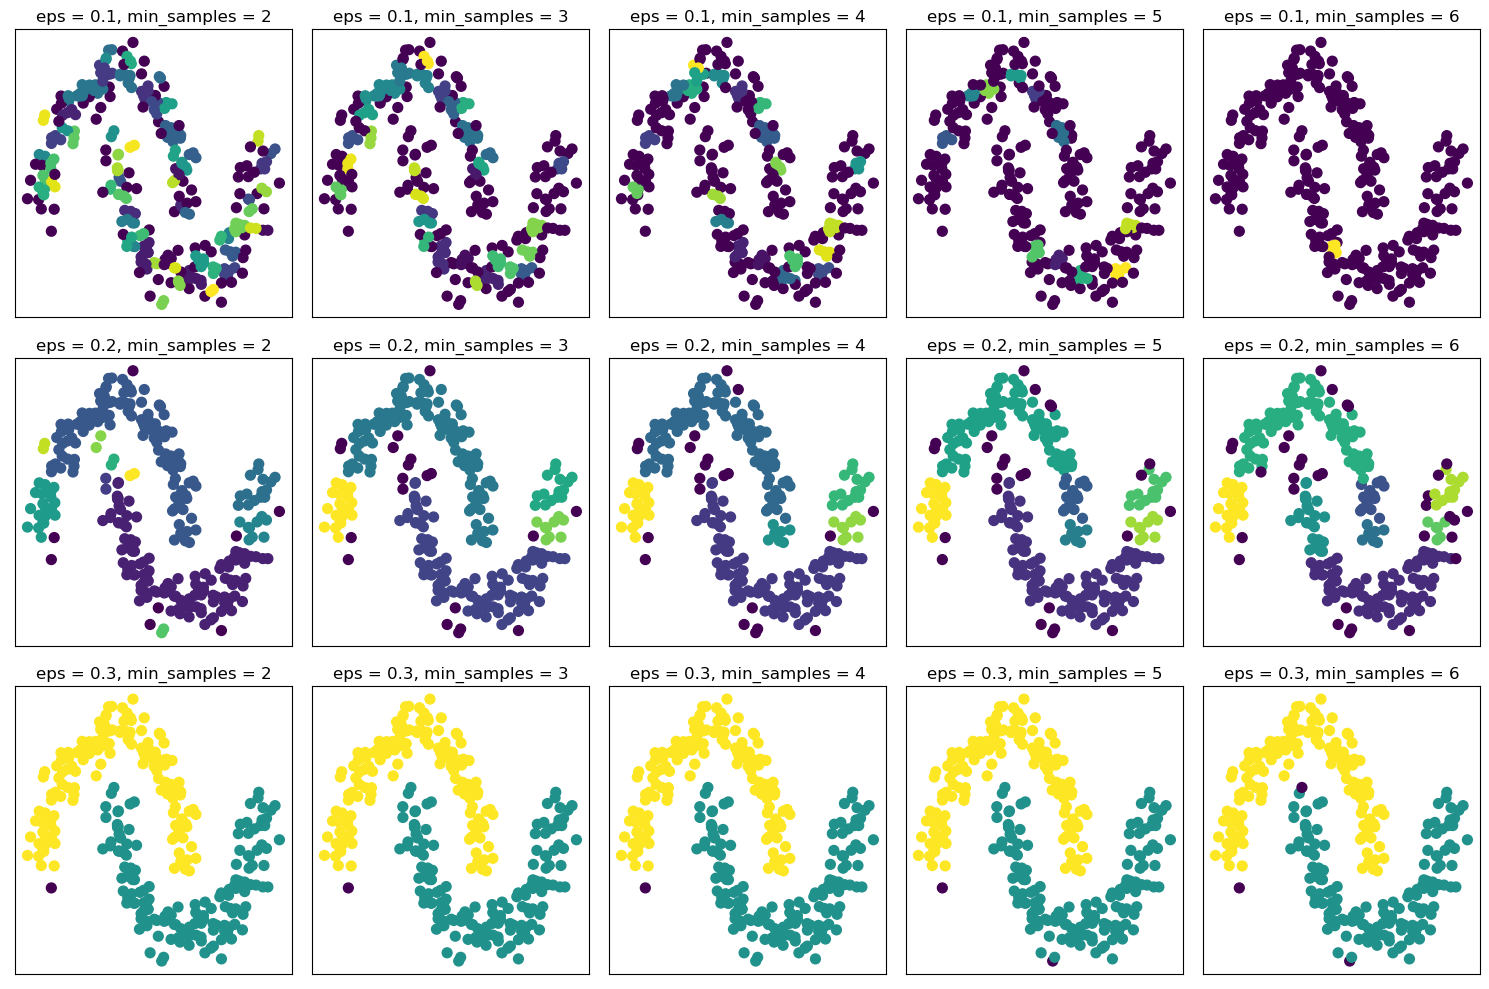

In [2]:
# Parameters to experiment with
eps_values = [0.1, 0.2, 0.3]
min_samples_values = [2, 3, 4, 5, 6]

# Create a grid of subplots
fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 10))

# Loop over all combinations of eps and min_samples
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        # Apply DBSCAN with current parameters
        db = DBSCAN(eps=eps, min_samples=min_samples)
        y_pred = db.fit_predict(X_scaled)  # Make sure to use the scaled data

        # Plot the results
        ax = axes[i, j]
        ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, s=50, cmap='viridis')
        ax.set_title(f'eps = {eps}, min_samples = {min_samples}')
        ax.set_xticks([])
        ax.set_yticks([])

# Adjust the layout of the plots
plt.tight_layout()
plt.show()

## Interpretation of DBSCAN Parameter Effects

The output plots from the DBSCAN clustering of the "make_moons" dataset with varying `eps` (epsilon) and `min_samples` values demonstrate the significant impact these parameters have on the clustering results:

### Influence of Epsilon (eps)

- **Epsilon = 0.1**: At this lowest epsilon value, clusters are very fragmented. Many points are considered as noise (purple points), especially as `min_samples` increases. This indicates that a small `eps` results in a higher number of data points being classified as outliers, as they do not meet the density requirement.

- **Epsilon = 0.2**: Increasing `eps` to 0.2 results in more cohesive clustering, with fewer points labeled as noise. The clusters start to form more clearly, showing the characteristic two-moon shapes. This suggests a balance between separating distinct clusters and minimizing the number of outliers.

- **Epsilon = 0.3**: At this value, the clusters are most coherent and closely match the true structure of the data. However, as `min_samples` increases, the risk of merging distinct clusters into a single cluster rises, which could oversimplify the dataset's structure.

### Influence of Minimum Samples (min_samples)

- **Min_samples = 2, 3**: With lower `min_samples`, the algorithm is less strict in defining core points, leading to more points being included in clusters. This results in dense clustering but also increases the sensitivity to noise, as more clusters are detected.

- **Min_samples = 4, 5, 6**: Higher values of `min_samples` make the algorithm more robust to noise by requiring more points in a neighborhood to form a core point. This results in fewer but larger and more significant clusters. It reflects a higher density requirement for cluster formation, which reduces the noise but may miss smaller clusters or more subtle structures within the data.

### Combined Effects

- **Low `eps` and High `min_samples`**: Almost all points are classified as noise, indicating overly stringent clustering criteria.
- **High `eps` and Low `min_samples`**: Tends to merge separate clusters, losing detail in the data structure.

## Conclusion

From this exploration, it is evident that choosing appropriate values for `eps` and `min_samples` is crucial for DBSCAN to effectively capture the underlying patterns in the data:

- **Optimal Parameter Selection**: The plots show that an `eps` of about 0.3 and `min_samples` of 3 to 4 seem to provide the best balance for this particular dataset, aligning well with the two-moon structure without oversimplifying or fragmenting the clusters.

- **Parameter Sensitivity**: The sensitivity of DBSCAN to its parameters underscores the need for careful tuning based on the specific characteristics of the dataset.

- **Noise Identification**: DBSCAN's ability to identify and label noise points is a significant advantage, particularly useful in applications like anomaly detection where such identification is crucial.

- **Cluster Shapes and Sizes**: The algorithm's non-reliance on spherical cluster shapes allows it to identify clusters of arbitrary and complex shapes, as evidenced by its performance on the "make_moons" dataset.

This analysis highlights the importance of parameter tuning in DBSCAN and demonstrates its capabilities and limitations in handling datasets with complex structures.